# Árboles de Decisión
**Módulos:** Sistemas de aprendizaje automático (SAA)   
**Curso:** 2025/26 - Curso Especialización en IA y Big Data - IES Ribera de Castilla

## 1. Concepto

Un **Árbol de Decisión** es un modelo de **aprendizaje supervisado** (utilizado tanto para clasificación como para regresión) que toma decisiones basándose en una estructura de grafo similar a un árbol.

El modelo aprende reglas de decisión simples (ej. "¿Es el `ingreso` > 50.000€?") inferidas a partir de las características de los datos.

La estructura se compone de:
- **Nodo Raíz (Root Node):** El nodo inicial que representa a toda la población de datos.
- **Nodos Internos (Internal Nodes):** Nodos donde se realiza una "pregunta" o se evalúa una característica para dividir los datos.
- **Ramas (Branches):** Representan el resultado de una decisión (ej. "Sí" o "No").
- **Nodos Hoja (Leaf Nodes):** Nodos terminales que representan el resultado final (una clase en clasificación, o un valor numérico en regresión).

El algoritmo busca en cada paso la mejor característica para dividir los datos, utilizando métricas como la **Impureza de Gini** o la **Ganancia de Información (Entropía)**.

## 2. Características Principales

### Ventajas
* **Interpretabilidad (White Box):** Son muy fáciles de entender y visualizar. Se pueden explicar las decisiones tomadas ("es un modelo de caja blanca").
* **Mínimo preprocesamiento:** No requieren normalización o escalado de los datos.
* **Manejo de datos mixtos:** Pueden trabajar con características numéricas y categóricas (aunque la implementación de `scikit-learn` requiere que sean numéricas).
* **Selección de características implícita:** Los nodos superiores del árbol son intrínsecamente las características más importantes.

### Desventajas
* **Sobreajuste (Overfitting):** Tienden a crear árboles muy complejos que memorizan los datos de entrenamiento pero no generalizan bien a datos nuevos. Esto se controla con la **poda (pruning)** o limitando la profundidad máxima (`max_depth`).
* **Inestabilidad:** Pequeños cambios en los datos de entrada pueden generar un árbol completamente diferente.
* **Sesgo:** Tienden a favorecer características que tienen muchos niveles o valores.

## 3. Usos y Aplicaciones Habituales

Los árboles de decisión son muy comunes en problemas donde la interpretabilidad es clave:

**Clasificación:**
* **Diagnóstico Médico:** (ej. ¿Tiene el paciente gripe basado en síntomas?).
* **Análisis de Riesgo Crediticio:** (ej. ¿Se debe aprobar un préstamo?).
* **Filtro de Spam.**

**Regresión:**
* **Predicción de precios:** (ej. Estimar el precio de una vivienda).
* **Estimación de demanda.**

## 4. Ejemplos con Python y Scikit-learn

Vamos a implementar los dos tipos de árboles (Clasificación y Regresión) usando las librerías que vemos en el módulo de PIA[cite: 188].

### Ejemplo 1: Clasificación con `DecisionTreeClassifier` (Dataset Iris)

El objetivo es clasificar una flor de iris en una de sus tres especies (Setosa, Versicolor, Virginica) basándose en la longitud y anchura de sus pétalos y sépalos.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
# 1. Cargar datos
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

print("Features (X):")
print(X.head())
print("\nTarget (y) (0=Setosa, 1=Versicolor, 2=Virginica):")
print(y[:5])

Features (X):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Target (y) (0=Setosa, 1=Versicolor, 2=Virginica):
[0 0 0 0 0]


In [5]:
# 2. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# 3. Crear y entrenar el modelo
# Usamos max_depth=3 para prevenir el sobreajuste y hacerlo interpretable.
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [7]:
# 4. Evaluar el modelo
y_pred = clf.predict(X_test)

print(f"Accuracy (Precisión): {accuracy_score(y_test, y_pred):.2f}")
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy (Precisión): 1.00

Matriz de Confusión:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Reporte de Clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



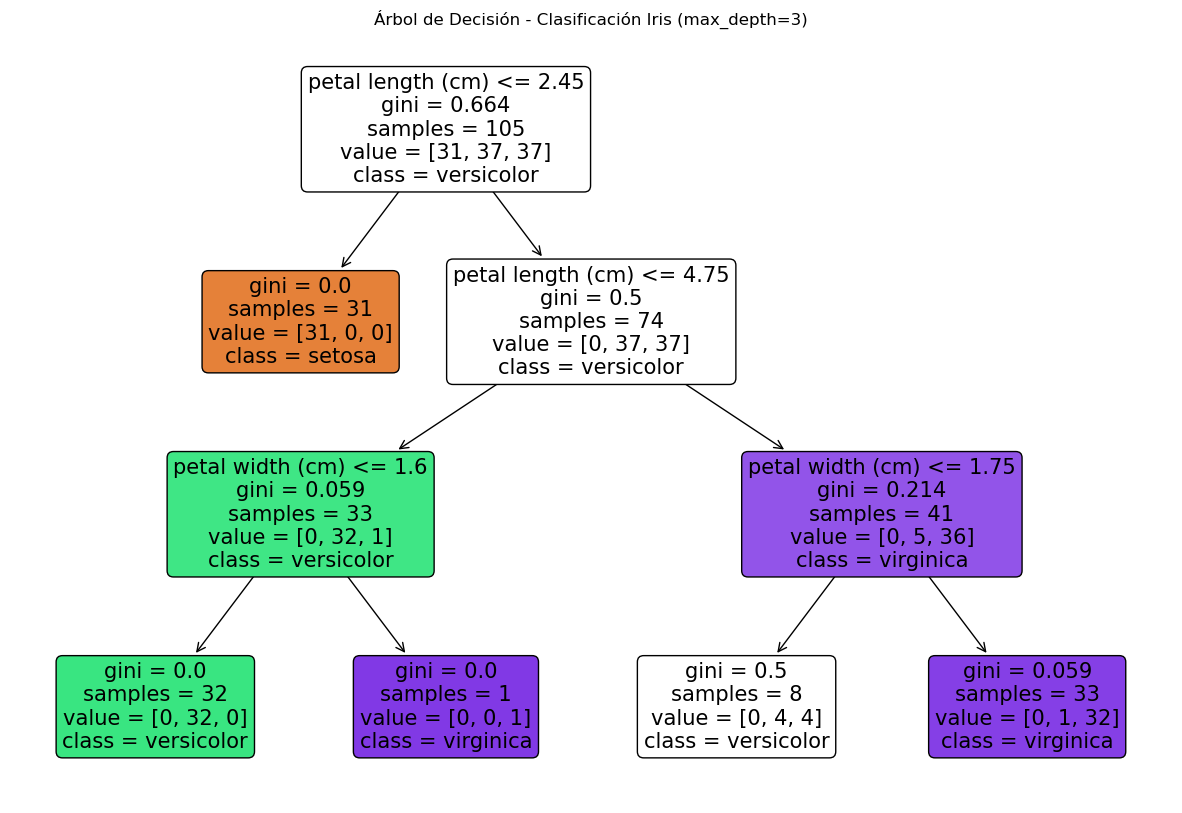

In [8]:
# 5. Visualizar el árbol
plt.figure(figsize=(15, 10))
plot_tree(clf,
          filled=True,      # Colorea los nodos
          rounded=True,     # Nodos con bordes redondeados
          class_names=iris.target_names, # Nombres de las clases (target)
          feature_names=iris.feature_names) # Nombres de las características (features)
plt.title("Árbol de Decisión - Clasificación Iris (max_depth=3)")
plt.show()

### Ejemplo 2: Regresión con `DecisionTreeRegressor` (Dataset Diabetes)

El objetivo es predecir una medida cuantitativa de la progresión de la diabetes un año después, basándose en 10 variables (edad, sexo, bmi, presión arterial, etc.).

In [9]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
# 1. Cargar datos
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

print("Features (X):")
print(X.head())
print("\nTarget (y) (Progresión de la diabetes):")
print(y[:5])

Features (X):
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  

Target (y) (Progresión de la diabetes):
[151.  75. 141. 206. 135.]


In [11]:
# 2. Dividir
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# 3. Crear y entrenar el modelo
# En regresión, el criterio suele ser 'squared_error'
reg = DecisionTreeRegressor(criterion='squared_error', max_depth=4, random_state=42)
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [13]:
# 4. Evaluar
y_pred_reg = reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred_reg)
r2 = r2_score(y_test, y_pred_reg)

print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {np.sqrt(mse):.2f}")
print(f"Coeficiente R2: {r2:.2f}")

Error Cuadrático Medio (MSE): 3649.42
Raíz del Error Cuadrático Medio (RMSE): 60.41
Coeficiente R2: 0.32


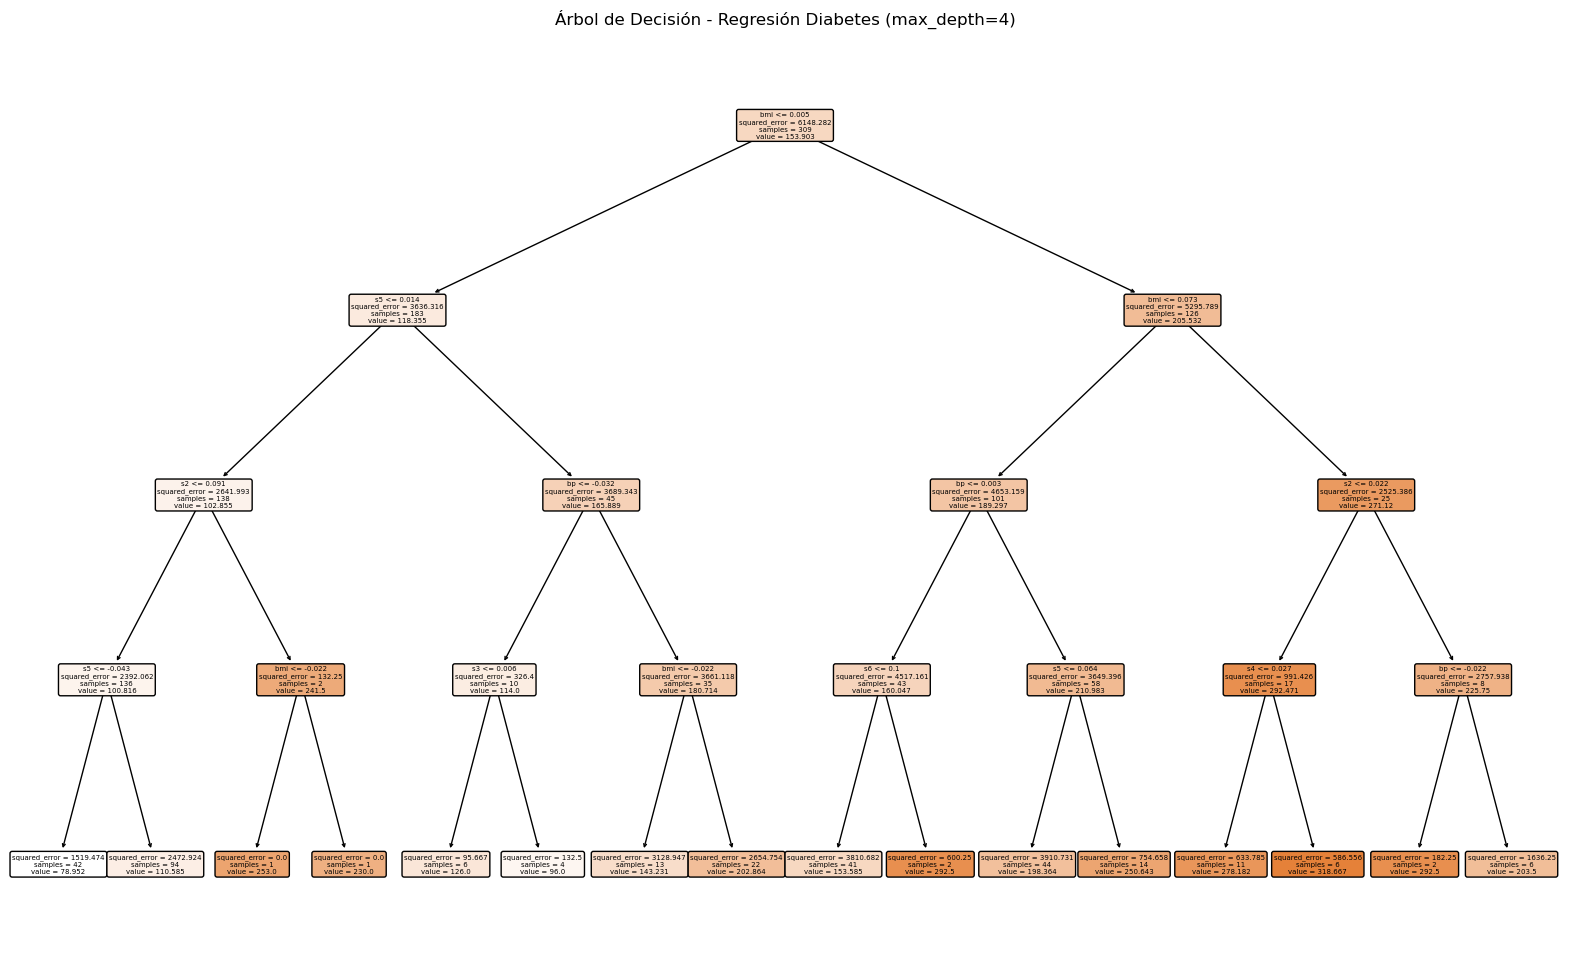

In [14]:
# 5. Visualizar (Regresión)
# Nota: En regresión, el 'value' en la hoja es el valor medio predicho para ese grupo.
plt.figure(figsize=(20, 12))
plot_tree(reg,
          filled=True,
          rounded=True,
          feature_names=diabetes.feature_names)
plt.title("Árbol de Decisión - Regresión Diabetes (max_depth=4)")
plt.show()

### Buscando el nodo hijo más puro...   

Que el algoritmo intente producir "nodos hijos lo más puros posibles" significa que busca encontrar la "pregunta" (la división de los datos) que mejor separe las clases en grupos homogéneos.

Imaginar que tenemos una baraja de cartas mezclada (ese es el nodo raíz, muy "impuro" porque tiene las 4 palos).

El objetivo del algoritmo es encontrar la pregunta que mejor las separe:
- Pregunta A (Mala): "¿Es la carta un 7?"
    - Nodo Hijo 1 (Sí): Tendrás 4 cartas (el 7 de Picas, 7 de Corazones, 7 de Diamantes, 7 de Tréboles). Sigue siendo un nodo muy impuro (mezclado).

    - Nodo Hijo 2 (No): Tendrás el resto de la baraja. Sigue siendo muy impuro.

- Pregunta B (Buena): "¿Es la carta de color rojo?"
    - Nodo Hijo 1 (Sí): Tendrás solo Corazones y Diamantes. Este nodo es más puro que el nodo original (la baraja entera), ya que hemos eliminado las Picas y los Tréboles

    - Nodo Hijo 2 (No): Tendrás solo Picas y Tréboles. Este nodo también es más puro.

El algoritmo de Árbol de Decisión, al "buscar la pureza", elegirá automáticamente la Pregunta B.

**Aplicado al Aprendizaje Automático**   
En el contexto del experimento con el dataset de pingüinos:    
- Nodo 100% Puro (El objetivo): Un nodo que contiene 50 muestras, y las 50 son de la especie "Adelie". El algoritmo ha aislado perfectamente esa clase. Como ya es puro, este nodo se convierte en un nodo hoja (una respuesta final).

- Nodo 50/50 (Impuro): Un nodo que contiene 100 muestras (50 "Adelie" y 50 "Gentoo"). Este es el peor escenario de "impureza" (para 2 clases). El algoritmo está obligado a hacer otra pregunta (otro "split") para intentar separarlos.   

Las métricas que incluimos en el documento LaTeX (Gini y Entropía) son simplemente las fórmulas matemáticas que miden este "desorden". El algoritmo busca la división que más reduce el valor de Gini o de Entropía.